In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import colors
from matplotlib.colors import ListedColormap
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from datetime import datetime
import matplotlib.pyplot as plt

In [154]:
data = pd.read_csv("marketing_campaign.xls",sep='\t')
data.Dt_Customer = pd.to_datetime(data.Dt_Customer,format="%d-%m-%Y")
data.insert(2,"Age",2024-data.Year_Birth)
data["Marital_Status"] = data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
data = data.dropna()
data.insert(6,"Spent",data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"])
data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,67,Graduation,Alone,58138.0,1617,0,0,2012-09-04,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,70,Graduation,Alone,46344.0,27,1,1,2014-03-08,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,59,Graduation,Partner,71613.0,776,0,0,2013-08-21,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,40,Graduation,Partner,26646.0,53,1,0,2014-02-10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,43,PhD,Partner,58293.0,422,1,0,2014-01-19,...,5,0,0,0,0,0,0,3,11,0


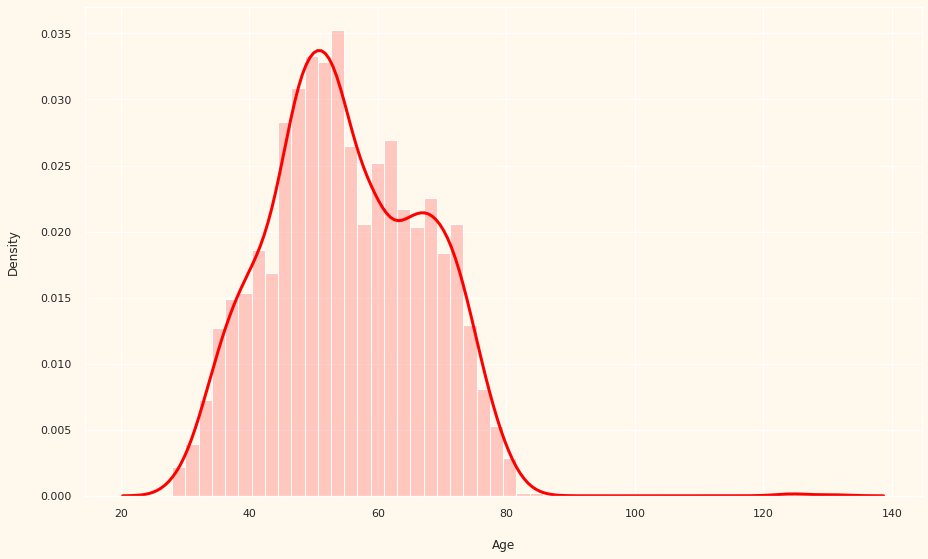

In [155]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    data.Age, 
    bins=50, 
    stat='density',
    alpha=0.2,
    color = "red"
)

density_curve = sns.kdeplot(data.Age, linewidth=3, color="red")

plt.xlabel("Age", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [156]:
data = data[data.Age < 100]

In [157]:
mean_age = data.Age.mean()
median_age = data.Age.median()
std_age = data.Age.std()
print("Media: " + str(mean_age))
print("Mediana: " + str(median_age))
print("Standard deviation: " + str(std_age))

Media: 55.082693176683236
Mediana: 54.0
Standard deviation: 11.70021612968385


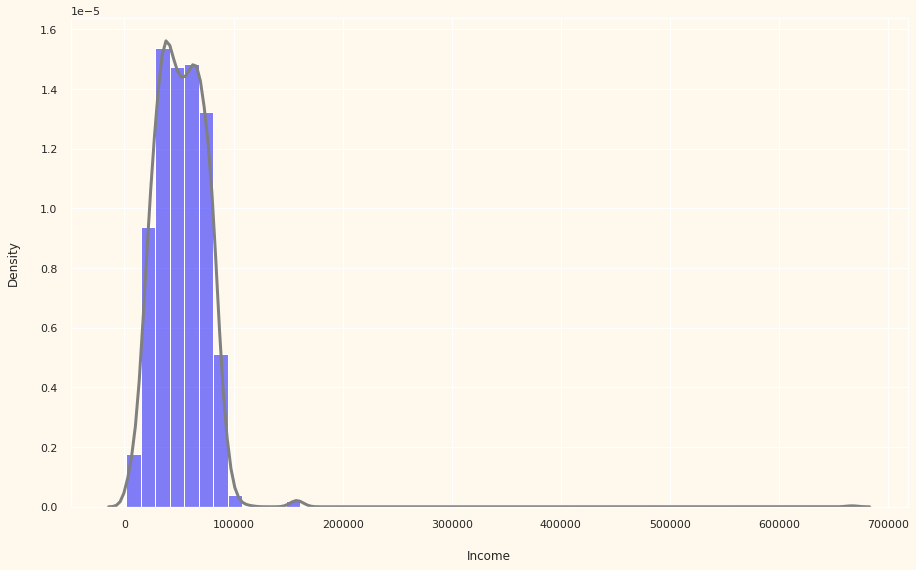

In [158]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    data.Income, 
    bins=50, 
    stat='density',
    alpha=0.5,
    color = "blue"
)

density_curve = sns.kdeplot(data.Income, linewidth=3, color="grey")

plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [159]:
data = data[data.Income < 600000]

In [160]:
mean_income = data.Income.mean()
median_income = data.Income.median()
std_income = data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 51958.81057866185
Mediana: 51371.0
Standard deviation: 21527.278844050485


In [161]:
counts_edu = data.Education.value_counts()
print(counts_edu)

Education
Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: count, dtype: int64


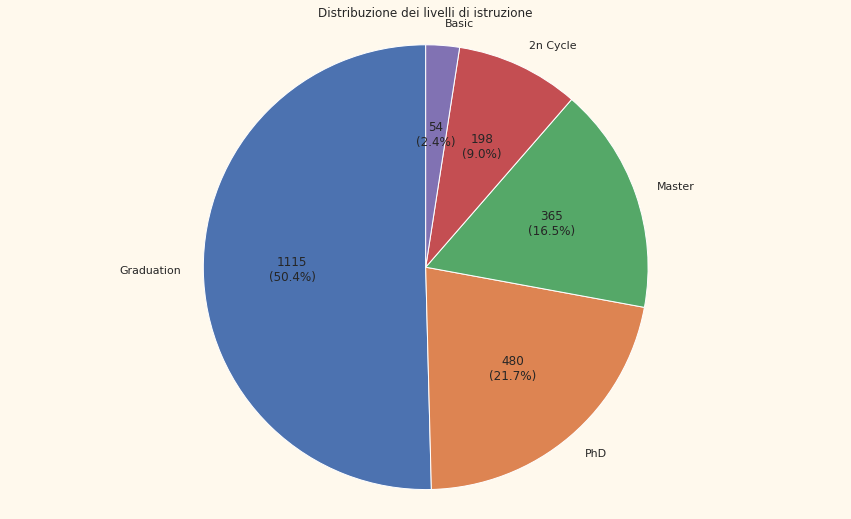

In [162]:
total = counts_edu.sum()

# Funzione per mostrare sia i conteggi che le percentuali
def autopct(pct):
    count = int(round(pct * total / 100))
    return f'{count}\n({pct:.1f}%)'
plt.figure(figsize=(15,9))
plt.pie(counts_edu, labels=counts_edu.index, autopct=autopct, startangle=90)
plt.axis('equal')
plt.title('Distribuzione dei livelli di istruzione')
plt.show()

In [163]:
counts_status = data.Marital_Status.value_counts()
print(counts_status)

Marital_Status
Partner    1428
Alone       784
Name: count, dtype: int64


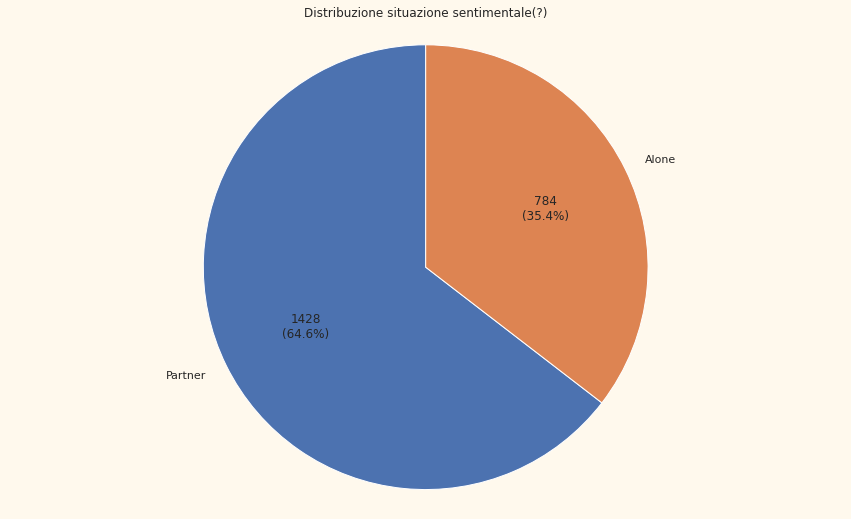

In [164]:
total = counts_status.sum()

# Funzione per mostrare sia i conteggi che le percentuali
def autopct(pct):
    count = int(round(pct * total / 100))
    return f'{count}\n({pct:.1f}%)'
plt.figure(figsize=(15,9))
plt.pie(counts_status, labels=counts_status.index, autopct=autopct, startangle=90)
plt.axis('equal')
plt.title('Distribuzione situazione sentimentale(?)')
plt.show()

In [165]:
counts_children = data.Kidhome.value_counts()
print(counts_children)

Kidhome
0    1281
1     885
2      46
Name: count, dtype: int64


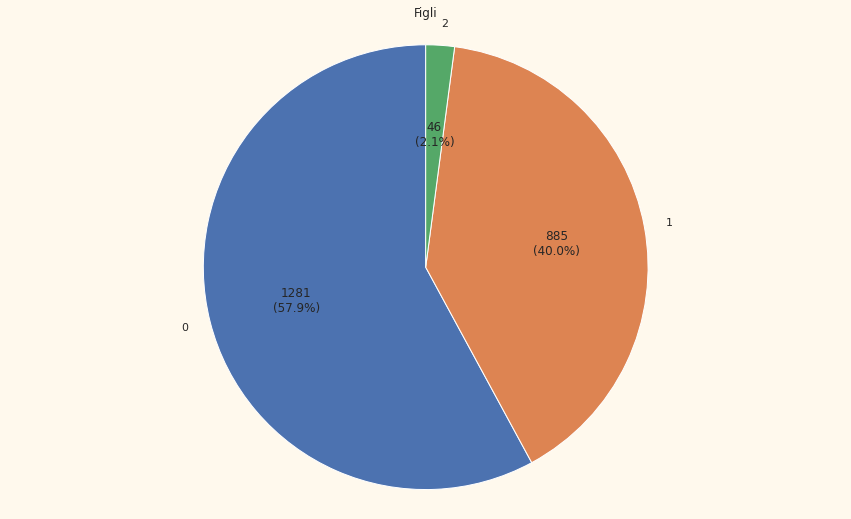

In [166]:
total = counts_children.sum()

# Funzione per mostrare sia i conteggi che le percentuali
def autopct(pct):
    count = int(round(pct * total / 100))
    return f'{count}\n({pct:.1f}%)'
plt.figure(figsize=(15,9))
plt.pie(counts_children, labels=counts_children.index, autopct=autopct, startangle=90)
plt.axis('equal')
plt.title('Figli')
plt.show()

In [167]:
counts_teen = data.Teenhome.value_counts()
print(counts_teen)

Teenhome
0    1144
1    1017
2      51
Name: count, dtype: int64


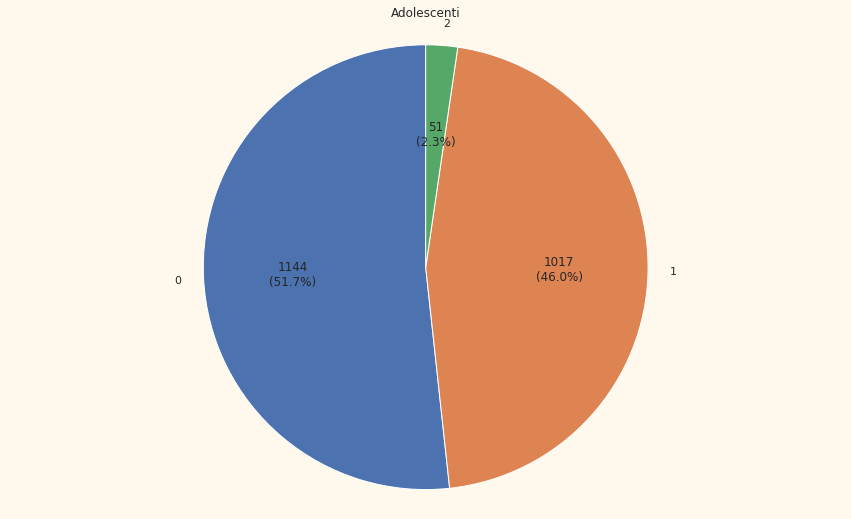

In [168]:
total = counts_teen.sum()

# Funzione per mostrare sia i conteggi che le percentuali
def autopct(pct):
    count = int(round(pct * total / 100))
    return f'{count}\n({pct:.1f}%)'
plt.figure(figsize=(15,9))
plt.pie(counts_teen, labels=counts_teen.index, autopct=autopct, startangle=90)
plt.axis('equal')
plt.title('Adolescenti')
plt.show()

In [169]:
data.insert(9,"Children",data["Kidhome"]+ data["Teenhome"])
data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Children,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,67,Graduation,Alone,58138.0,1617,0,0,0,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,70,Graduation,Alone,46344.0,27,1,1,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,59,Graduation,Partner,71613.0,776,0,0,0,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,40,Graduation,Partner,26646.0,53,1,0,1,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,43,PhD,Partner,58293.0,422,1,0,1,...,5,0,0,0,0,0,0,3,11,0


In [170]:
counts_figli = data.Children.value_counts()
print(counts_figli)

Children
1    1114
0     632
2     416
3      50
Name: count, dtype: int64


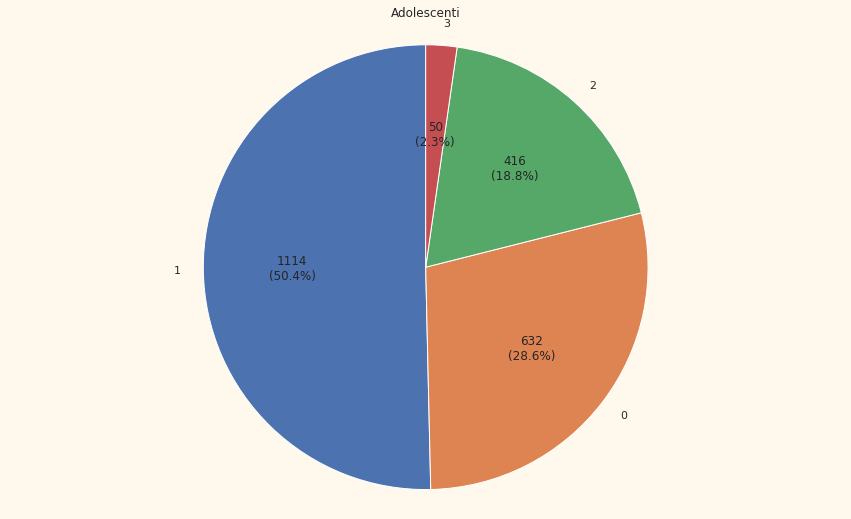

In [171]:
total = counts_figli.sum()

# Funzione per mostrare sia i conteggi che le percentuali
def autopct(pct):
    count = int(round(pct * total / 100))
    return f'{count}\n({pct:.1f}%)'
plt.figure(figsize=(15,9))
plt.pie(counts_figli, labels=counts_figli.index, autopct=autopct, startangle=90)
plt.axis('equal')
plt.title('Adolescenti')
plt.show()

In [172]:
phd_data = data.loc[data.Education== 'PhD']
phd_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Children,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
4,5324,1981,43,PhD,Partner,58293.0,422,1,0,1,...,5,0,0,0,0,0,0,3,11,0
7,6177,1985,39,PhD,Partner,33454.0,169,1,0,1,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,50,PhD,Partner,30351.0,46,1,0,1,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,74,PhD,Partner,5648.0,49,1,1,2,...,20,1,0,0,0,0,0,3,11,0
15,2114,1946,78,PhD,Alone,82800.0,1315,0,0,0,...,3,0,0,1,1,0,0,3,11,1


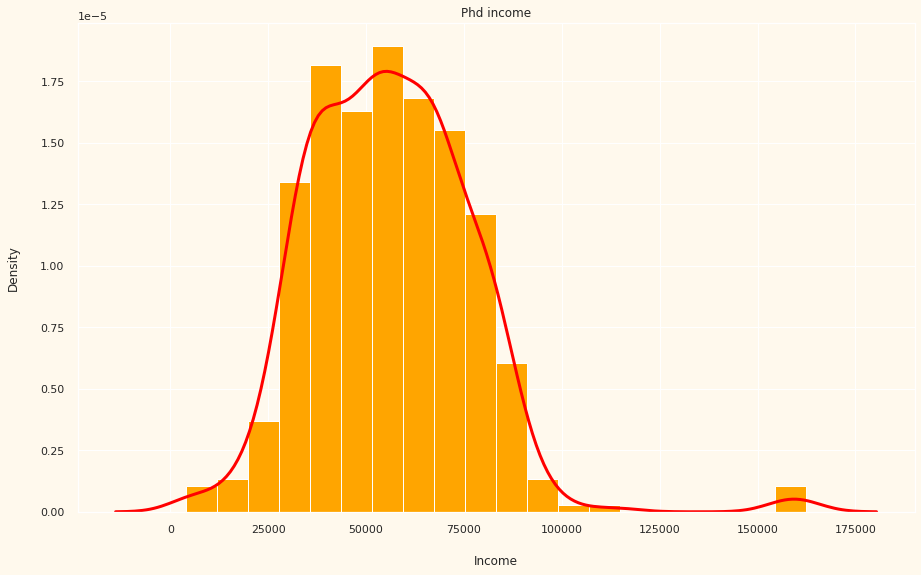

In [173]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    phd_data.Income, 
    bins=20, 
    stat='density',
    alpha=1,
    color = "orange"
)

density_curve = sns.kdeplot(phd_data.Income, linewidth=3, color="red")

plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.title("Phd income")
plt.show()

In [174]:
mean_income = phd_data.Income.mean()
median_income = phd_data.Income.median()
std_income = phd_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 56088.25833333333
Mediana: 55185.0
Standard deviation: 20596.42935560307


In [175]:
basic_data = data.loc[data.Education== 'Basic']
basic_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Children,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
11,387,1976,48,Basic,Partner,7500.0,61,0,0,0,...,8,0,0,0,0,0,0,3,11,0
105,8373,1979,45,Basic,Partner,24594.0,29,1,0,1,...,5,0,0,0,0,0,0,3,11,0
136,5342,1976,48,Basic,Alone,9548.0,29,1,0,1,...,8,0,0,0,0,0,0,3,11,0
184,2563,1961,63,Basic,Partner,28249.0,43,0,0,0,...,6,0,0,0,0,0,0,3,11,0
190,9733,1978,46,Basic,Partner,24882.0,80,1,0,1,...,6,1,0,0,0,0,0,3,11,0


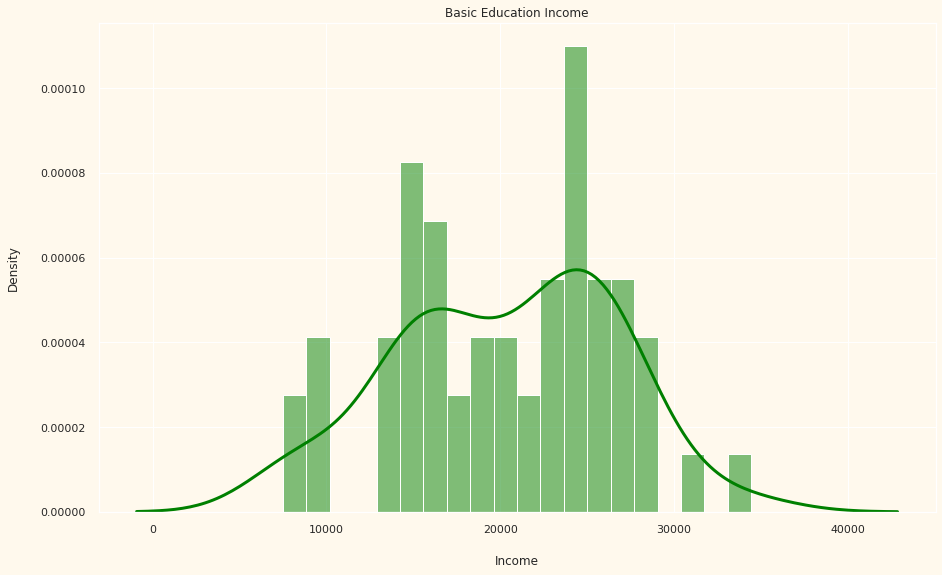

In [176]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    basic_data.Income, 
    bins=20, 
    stat='density',
    alpha=0.5,
    color = "green"
)

density_curve = sns.kdeplot(basic_data.Income, linewidth=3, color="green")

plt.title("Basic Education Income")
plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [177]:
mean_income = basic_data.Income.mean()
median_income = basic_data.Income.median()
std_income = basic_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 20306.25925925926
Mediana: 20744.0
Standard deviation: 6235.066773288437


In [178]:
graduation_data = data.loc[data.Education== 'Graduation']
graduation_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Children,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,67,Graduation,Alone,58138.0,1617,0,0,0,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,70,Graduation,Alone,46344.0,27,1,1,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,59,Graduation,Partner,71613.0,776,0,0,0,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,40,Graduation,Partner,26646.0,53,1,0,1,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,53,Graduation,Alone,55635.0,590,0,1,1,...,6,0,0,0,0,0,0,3,11,0


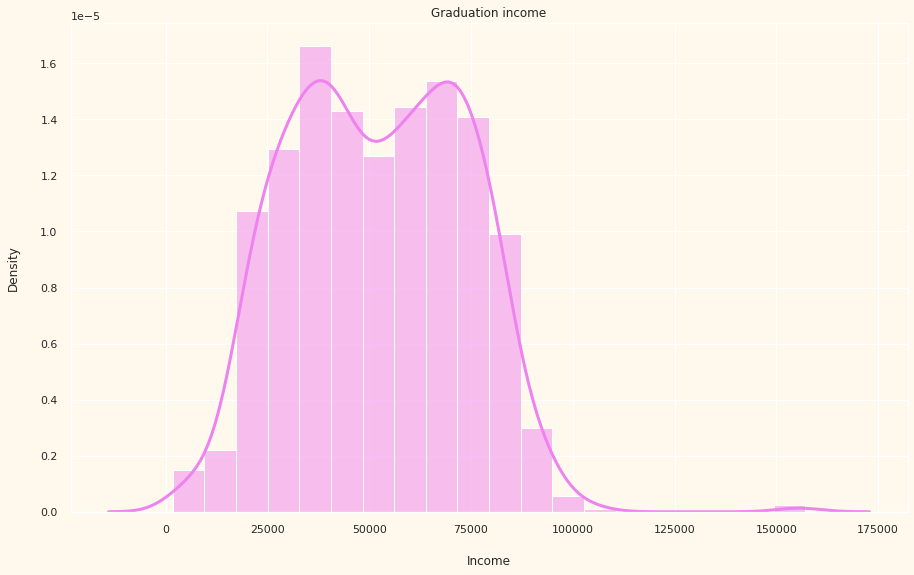

In [179]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    graduation_data.Income, 
    bins=20, 
    stat='density',
    alpha=0.5,
    color = "violet"
)

density_curve = sns.kdeplot(graduation_data.Income, linewidth=3, color="violet")

plt.title("Graduation income")
plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [180]:
graduation_data = graduation_data[graduation_data.Income < 600000]

In [181]:
mean_income = graduation_data.Income.mean()
median_income = graduation_data.Income.median()
std_income = graduation_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 52169.74977578475
Mediana: 51983.0
Standard deviation: 21354.316952362668


In [182]:
cycle_data = data.loc[data.Education== '2n Cycle']
cycle_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Children,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
19,2278,1985,39,2n Cycle,Alone,33812.0,133,1,0,1,...,6,0,0,0,0,0,0,3,11,0
37,10755,1976,48,2n Cycle,Partner,23718.0,81,1,0,1,...,7,0,0,0,0,0,0,3,11,0
46,9909,1996,28,2n Cycle,Partner,7500.0,122,0,0,0,...,9,0,0,0,0,0,0,3,11,1
67,9369,1979,45,2n Cycle,Alone,88194.0,1274,0,1,1,...,5,1,0,0,1,0,0,3,11,1
78,10401,1976,48,2n Cycle,Partner,26326.0,18,0,0,0,...,3,0,0,0,0,0,1,3,11,0


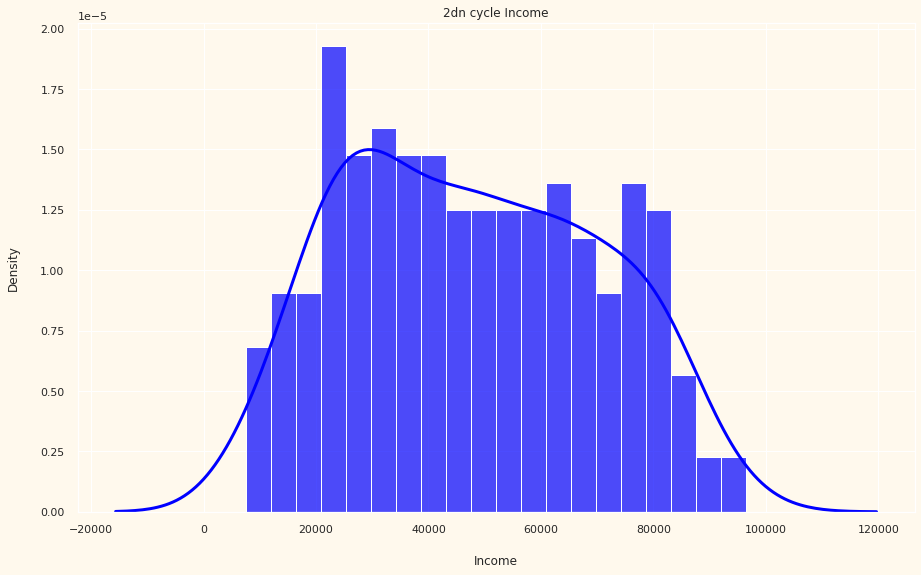

In [183]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    cycle_data.Income, 
    bins=20, 
    stat='density',
    alpha=0.7,
    color = "blue"
)

density_curve = sns.kdeplot(cycle_data.Income, linewidth=3, color="blue")

plt.title("2dn cycle Income")
plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [184]:
mean_income = cycle_data.Income.mean()
median_income = cycle_data.Income.median()
std_income = cycle_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 47625.333333333336
Mediana: 46805.0
Standard deviation: 22199.278285245826


In [185]:
master_data = data.loc[data.Education== 'Master']
master_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Children,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
5,7446,1967,57,Master,Partner,62513.0,716,0,1,1,...,6,0,0,0,0,0,0,3,11,0
13,8180,1952,72,Master,Alone,59354.0,310,1,1,2,...,6,0,0,0,0,0,0,3,11,0
18,6565,1949,75,Master,Partner,76995.0,1782,0,1,1,...,5,0,0,0,1,0,0,3,11,0
30,6864,1989,35,Master,Alone,10979.0,30,0,0,0,...,5,0,0,0,0,0,0,3,11,0
31,3033,1963,61,Master,Partner,38620.0,318,0,0,0,...,3,0,0,0,0,0,0,3,11,0


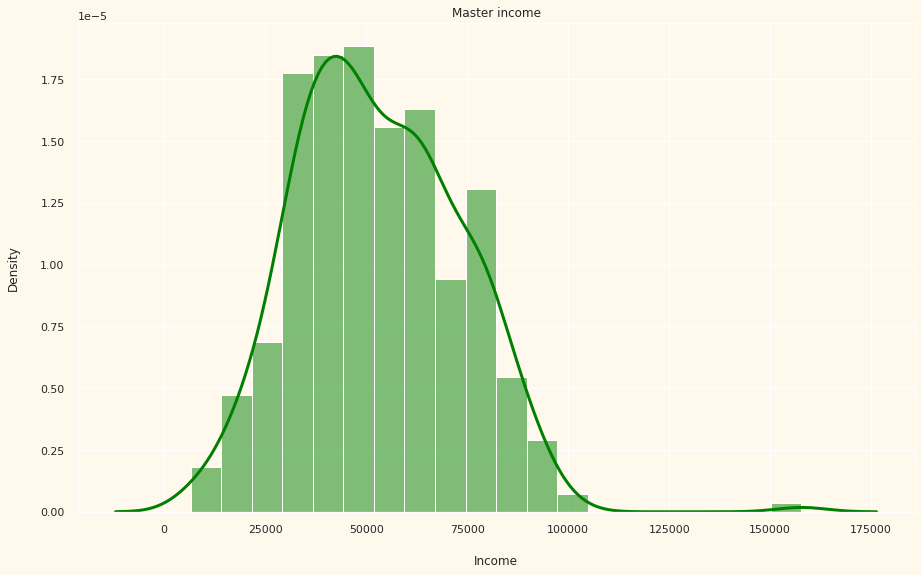

In [186]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    master_data.Income, 
    bins=20, 
    stat='density',
    alpha=0.5,
    color = "green"
)

density_curve = sns.kdeplot(master_data.Income, linewidth=3, color="green")

plt.title("Master income")
plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [187]:
mean_income = master_data.Income.mean()
median_income = master_data.Income.median()
std_income = master_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 52917.53424657534
Mediana: 50943.0
Standard deviation: 20157.78802913486


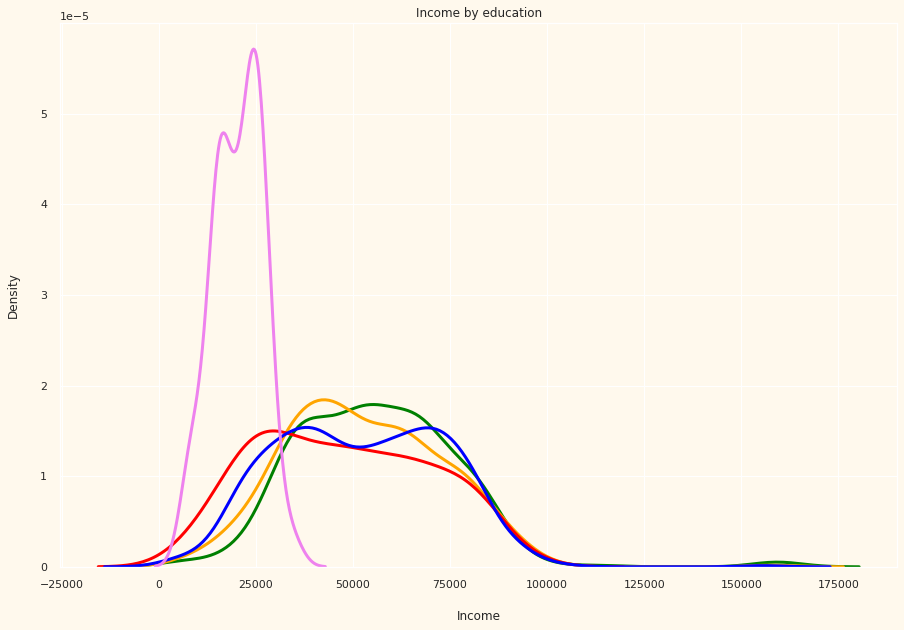

In [188]:
plt.figure(figsize=(15,10))

density_curve = sns.kdeplot(phd_data.Income, linewidth=3, color="green")
density_curve = sns.kdeplot(master_data.Income, linewidth=3, color="orange")
density_curve = sns.kdeplot(cycle_data.Income, linewidth=3, color="red")
density_curve = sns.kdeplot(graduation_data.Income, linewidth=3, color="blue")
density_curve = sns.kdeplot(basic_data.Income, linewidth=3, color="violet")

plt.title("Income by education")
plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

#ciao

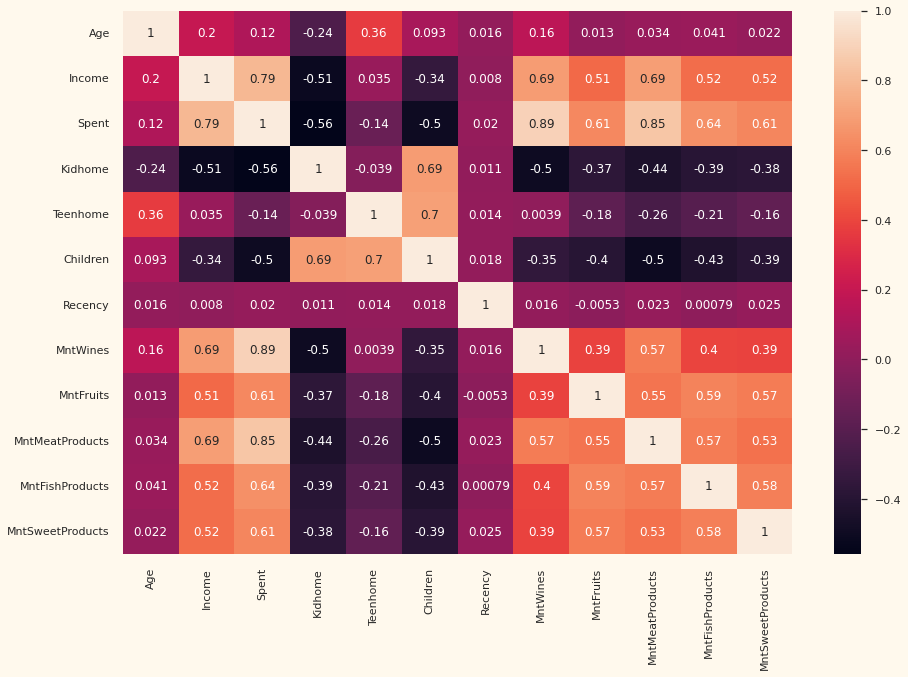

In [189]:
#heatmap per vedere correlazione tra gli attributi
data.drop(["ID","Year_Birth"],axis=1, inplace=True)
data.drop(data.iloc[:, 15:], inplace = True, axis = 1)
data=data.select_dtypes(include=['number'])
plt.figure(figsize=(15,10))
 
ax = sns.heatmap(data.corr(), annot=True)

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 432x288 with 0 Axes>

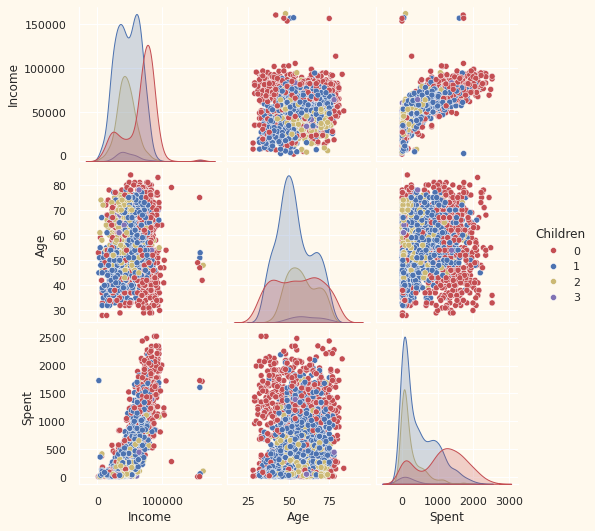

In [190]:
#grafico pairplot per vedere correlazione tra alcuni attributi e il numero dei figli dei clienti
sns.set_theme(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"])
To_Plot = [ "Income", "Age", "Spent", "Children"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Children",palette= (["r","b","y","m"])) 
plt.show()

In [191]:
data = data.drop(["Teenhome","Kidhome"],axis=1)
data.head()

,Age,Income,Spent,Children,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
0,67,58138.0,1617,0,58,635,88,546,172,88
1,70,46344.0,27,2,38,11,1,6,2,1
2,59,71613.0,776,0,26,426,49,127,111,21
3,40,26646.0,53,1,26,11,4,20,10,3
4,43,58293.0,422,1,94,173,43,118,46,27


In [192]:
scaler = StandardScaler()
scaler.fit(data)
scaled_data = pd.DataFrame(scaler.transform(data),columns=data.columns)

In [193]:
#PCA per ridurre a 3 dimensioni
pca = PCA(n_components=3)
pca.fit(scaled_data)
PCA_ds = pd.DataFrame(pca.transform(scaled_data), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,9.636656e-18,2.219026,-2.870242,-1.902547,-0.829859,1.687012,6.932090
col2,2212.0,1.927331e-17,1.081258,-3.060373,-0.797755,0.008263,0.802698,3.900989
col3,2212.0,-1.606109e-18,0.999513,-1.996618,-0.852377,-0.002297,0.869231,2.048981


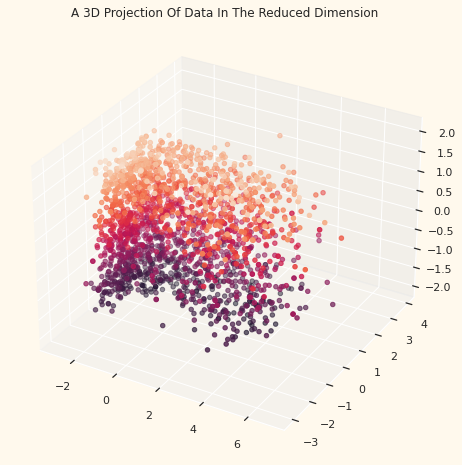

In [194]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o", c=z)
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Clustering

Elbow Method to determine the number of clusters to be formed:


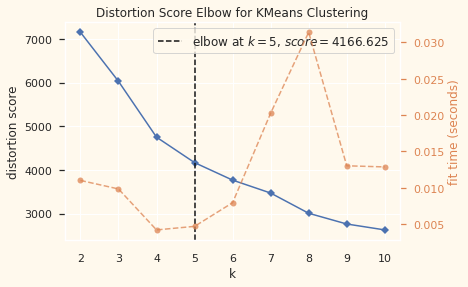

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [195]:
#numero di cluster da utilizzare usando il metodo a gomito con PCA
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

Elbow Method to determine the number of clusters to be formed:


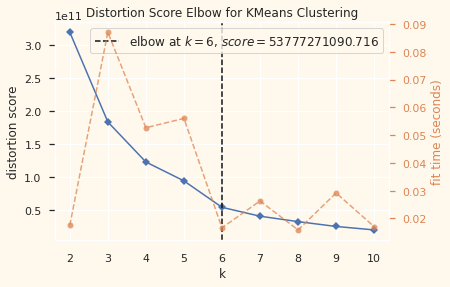

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [196]:
#senza pca
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data)
Elbow_M.show()

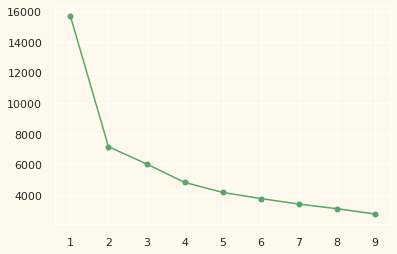

In [197]:
from sklearn.cluster import KMeans

ebw = []

for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(PCA_ds)
    ebw.append(km.inertia_)

plt.plot(range(1,10),ebw,'g',marker='o')
plt.show()

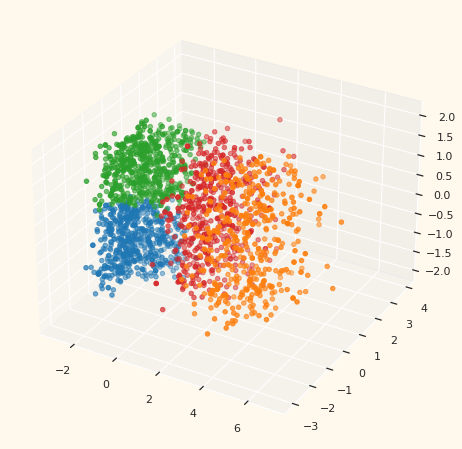

In [198]:
kmeans = KMeans(n_clusters=4,n_init=10,max_iter=300,random_state=0,tol=1e-04)
kmeans.fit(PCA_ds)
colormap = plt.get_cmap("tab10") 
cluster_colors = colormap(kmeans.labels_)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z,c=cluster_colors)
plt.show()

/home/aronds/.local/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


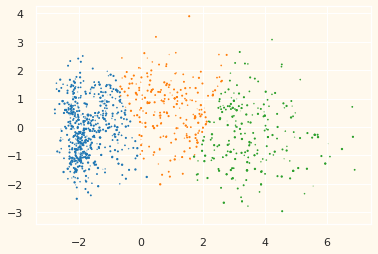

In [199]:
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(PCA_ds)
colormap = plt.get_cmap("tab10") 
cluster_colors = colormap(kmeans2.labels_)

plt.scatter(x,y,z,c=cluster_colors)
plt.show()

In [200]:
kmeans3 = KMeans(n_clusters=3,n_init=10,max_iter=300,random_state=0,tol=1e-04)
kmeans3.fit(data)

KMeans(n_clusters=3, n_init=10, random_state=0)

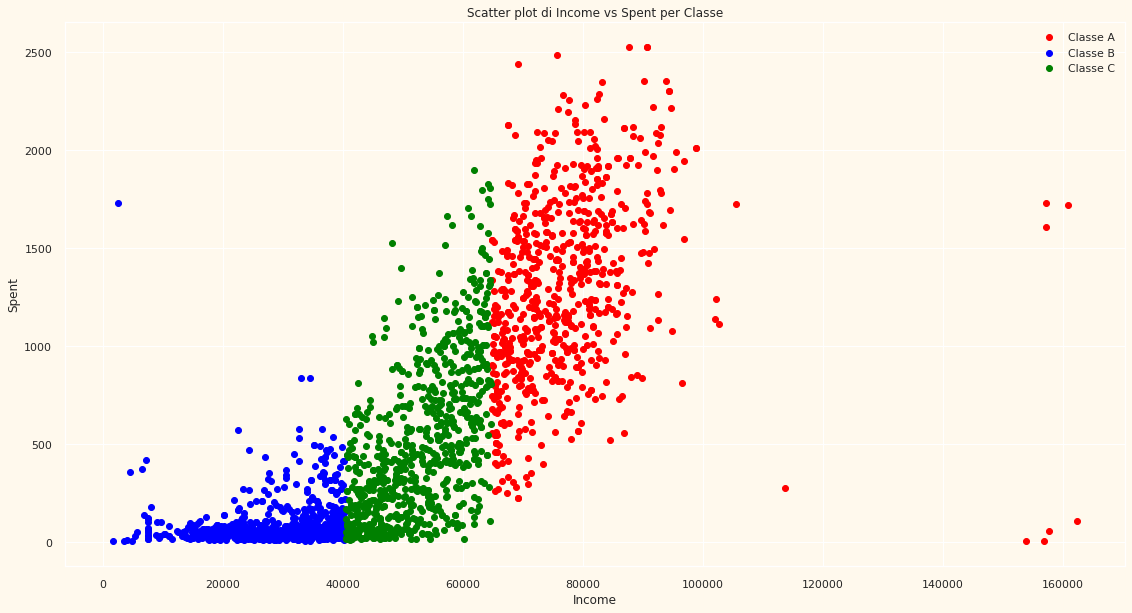

In [201]:
newData = data
newData["Class"] = kmeans3.labels_

newData0 = newData.loc[newData.Class== 0]
newData1 = newData.loc[newData.Class== 1]
newData2 = newData.loc[newData.Class== 2]

plt.figure(figsize=(19,10))

# Grafico
plt.scatter(newData0.Income, newData0.Spent, color='red', label='Classe A')
plt.scatter(newData1.Income, newData1.Spent, color='blue', label='Classe B')
plt.scatter(newData2.Income, newData2.Spent, color='green', label='Classe C')

# Etichette e titoli
plt.xlabel('Income')
plt.ylabel('Spent')
plt.title('Scatter plot di Income vs Spent per Classe')
plt.legend()

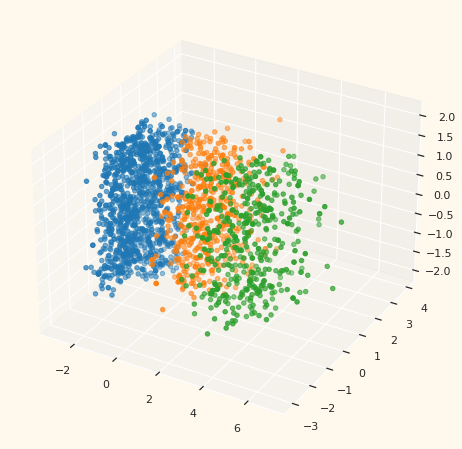

In [202]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
colormap = plt.get_cmap("tab10") 
cluster_colors = colormap(kmeans2.labels_)
ax.scatter(x,y,z,c=cluster_colors)
plt.show()

In [203]:
kmeans.labels_

array([1, 0, 3, ..., 3, 3, 0], dtype=int32)

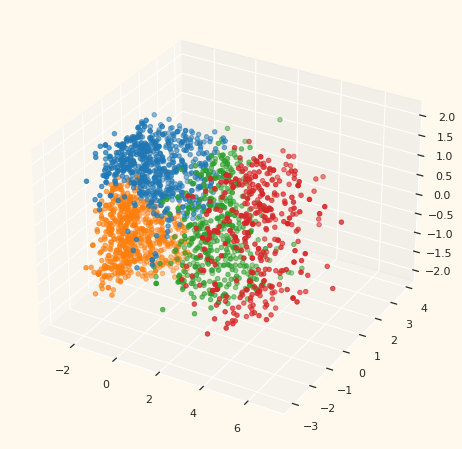

In [204]:
ac = AgglomerativeClustering(n_clusters=4)
predictions = ac.fit_predict(PCA_ds)
colormap = plt.get_cmap("tab10") 
cluster_colors = colormap(predictions)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z,c=cluster_colors,marker='o')
plt.show()

In [205]:
ac2 = AgglomerativeClustering(n_clusters=5)
ac2.fit(data)

AgglomerativeClustering(n_clusters=5)

In [206]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

silhouette = silhouette_score(PCA_ds, kmeans.labels_)
db_index = davies_bouldin_score(PCA_ds, kmeans.labels_)
ch_index = calinski_harabasz_score(PCA_ds, kmeans.labels_)

print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.28
Davies-Bouldin Index: 1.22
Calinski-Harabasz Index: 1693.48


In [207]:
silhouette = silhouette_score(data, kmeans3.labels_)
db_index = davies_bouldin_score(data, kmeans3.labels_)
ch_index = calinski_harabasz_score(data, kmeans3.labels_)

print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.54
Davies-Bouldin Index: 0.55
Calinski-Harabasz Index: 5075.87


In [208]:
unique, counts = np.unique(kmeans3.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 684, 1: 742, 2: 786}

In [209]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(data,
                                                          kmeans3.labels_,
                                                          test_size=0.30,
                                                          random_state=42)

In [210]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train, train_labels)
pred_y = classifier.predict(test)
cm = confusion_matrix(test_labels,pred_y)
accuracy_score(test_labels,pred_y)

1.0

<Axes: >

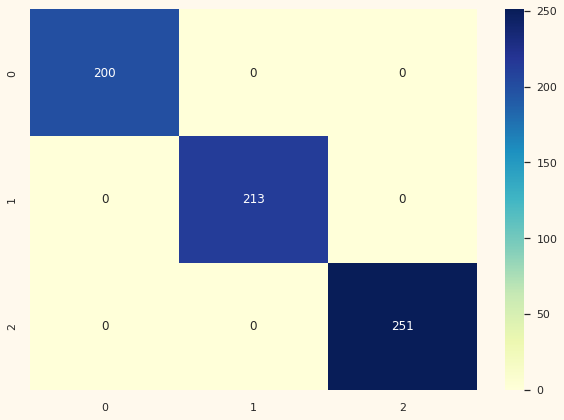

In [211]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True,fmt='g',cmap="YlGnBu")

In [212]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LogisticRegression()
scores = cross_val_score(model, data, predictions, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

/home/aronds/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/aronds/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Accuracy: 0.720 (0.037)


/home/aronds/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/aronds/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [213]:
print(scores)

[0.73423423 0.66666667 0.72850679 0.66968326 0.78733032 0.72850679
 0.71945701 0.71040724 0.68778281 0.76923077]


In [214]:
model = DecisionTreeClassifier()
scores = cross_val_score(model, data, predictions, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.888 (0.022)


In [215]:
print(scores)

[0.9009009  0.85585586 0.86877828 0.86877828 0.88687783 0.89140271
 0.92307692 0.8959276  0.86877828 0.92307692]


In [216]:
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

models = []

models.append(("LogisticRegression",LogisticRegression()))
models.append(("SVC",SVC()))
models.append(("LinearSVC",LinearSVC()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
rf2 = RandomForestClassifier(n_estimators=100, criterion='gini',
                                max_depth=10, random_state=0, max_features=None)
models.append(("RandomForest2",rf2))
models.append(("MLPClassifier",MLPClassifier(solver='lbfgs', random_state=0)))

results = []
names = []
for name,model in models:
    result = cross_val_score(model, train, train_labels,  cv=3)
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],results[i].mean())

/home/aronds/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/aronds/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

LogisticRegression 0.7571059431524548
SVC 0.9916020671834626
LinearSVC 0.5581395348837209
KNeighbors 0.9974160206718347
DecisionTree 1.0
RandomForest 1.0
RandomForest2 1.0
MLPClassifier 0.31266149870801035


/home/aronds/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/aronds/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/aronds/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH

In [217]:
model_name, model = models[4]
model.fit(train,train_labels)
pred_y = model.predict(test)
cm = confusion_matrix(test_labels,pred_y)
accuracy_score(test_labels,pred_y)

1.0